#Quiz #9

This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It contains

* An implement of Dijkstra's algorithm

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sys
import functools
import operator

## 1. Dijkstra's algorithm (#1)

In [2]:
class Dijkstra:
  def __init__(self, G, initial):
    self.G = G
    self.initial = initial
    self.dist_estimate = np.full(nx.number_of_nodes(G), sys.maxsize)
    self.dist_certainty = np.zeros(nx.number_of_nodes(G))
  
  def dijkstra(self):
    self.dist_estimate[self.initial] = 0
    while functools.reduce(operator.mul, self.dist_certainty) == 0:
      print("estimated distance: ", self.dist_estimate)
      print("certainty: ", self.dist_certainty)
      temp = np.where(self.dist_certainty == False, self.dist_estimate, sys.maxsize)
      current = np.argmin(temp)
      self.dist_certainty[current] = 1
      for i, (neighbor, edge) in enumerate(self.G[current].items()):
        self.dist_estimate[neighbor] = min(self.dist_estimate[current] + edge['weight'], self.dist_estimate[neighbor])
    
    print("estimated distance: ", self.dist_estimate)
    print("certainty: ", self.dist_certainty)

  def visualize(self):
    plt.figure(figsize = (5, 5))
    pos = nx.spring_layout(self.G)
    nx.draw_networkx_edges(self.G, pos)
    nx.draw_networkx_nodes(self.G, pos)
    nx.draw_networkx_edge_labels(self.G, pos, font_size = 16, edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data = True)})
    nx.draw_networkx_labels(self.G, pos)
    plt.axis('off')
    plt.show()

##2. Demonstration: start from vertex 0 (#2)

In [3]:
# create weighted graph
G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

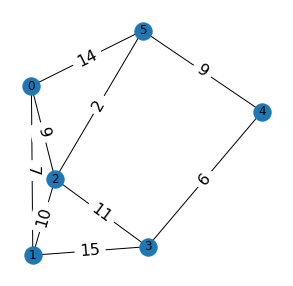

estimated distance:  [                  0 9223372036854775807 9223372036854775807
 9223372036854775807 9223372036854775807 9223372036854775807]
certainty:  [0. 0. 0. 0. 0. 0.]
estimated distance:  [                  0                   7                   9
 9223372036854775807 9223372036854775807                  14]
certainty:  [1. 0. 0. 0. 0. 0.]
estimated distance:  [                  0                   7                   9
                  22 9223372036854775807                  14]
certainty:  [1. 1. 0. 0. 0. 0.]
estimated distance:  [                  0                   7                   9
                  20 9223372036854775807                  11]
certainty:  [1. 1. 1. 0. 0. 0.]
estimated distance:  [ 0  7  9 20 20 11]
certainty:  [1. 1. 1. 0. 0. 1.]
estimated distance:  [ 0  7  9 20 20 11]
certainty:  [1. 1. 1. 1. 0. 1.]
estimated distance:  [ 0  7  9 20 20 11]
certainty:  [1. 1. 1. 1. 1. 1.]


In [4]:
demo = Dijkstra(G, 0)
demo.visualize()
demo.dijkstra()

##3. Demonstration: start from vertex 1 (#3)

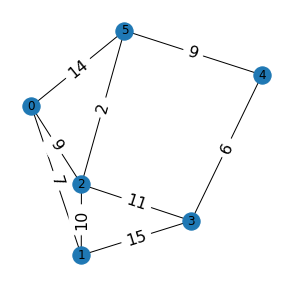

estimated distance:  [9223372036854775807                   0 9223372036854775807
 9223372036854775807 9223372036854775807 9223372036854775807]
certainty:  [0. 0. 0. 0. 0. 0.]
estimated distance:  [                  7                   0                  10
                  15 9223372036854775807 9223372036854775807]
certainty:  [0. 1. 0. 0. 0. 0.]
estimated distance:  [                  7                   0                  10
                  15 9223372036854775807                  21]
certainty:  [1. 1. 0. 0. 0. 0.]
estimated distance:  [                  7                   0                  10
                  15 9223372036854775807                  12]
certainty:  [1. 1. 1. 0. 0. 0.]
estimated distance:  [ 7  0 10 15 21 12]
certainty:  [1. 1. 1. 0. 0. 1.]
estimated distance:  [ 7  0 10 15 21 12]
certainty:  [1. 1. 1. 1. 0. 1.]
estimated distance:  [ 7  0 10 15 21 12]
certainty:  [1. 1. 1. 1. 1. 1.]


In [5]:
demo = Dijkstra(G, 1)
demo.visualize()
demo.dijkstra()

## 4. Why Dijkstra’s algorithm doesn't work for negative weight edges

Dijkstra's algorithm cannot handle networks containing negative weight edges because when a vertex's distance is marked as certain, it will not be consider by the algorithm again. This assumption works for edges with a positive weight since any path we find afterward is guaranteed to be not shorter.

However, when a network contains at least one negative weight edge, it is possible to find a shorter path later. For example, consider the network below (start from node $a$). Even if $w_{ab} > w_{ac}$, it is still possible that $w_{ab} + w_{bc} < w_{ac}$ if we allow negative weights. This scenario will make the algorithm fail to find the shortest path from $a$ to $c$.



In [6]:
%%capture
!apt update
!apt install imagemagick
!apt install pdf2svg
!apt install texlive texlive-latex-extra
!pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

In [7]:
%load_ext tikzmagic

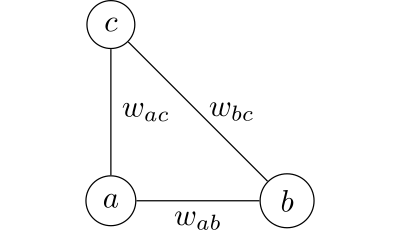

In [8]:
%%tikz -S graph.tikz -f svg
\node[draw, circle, fill=white] (a) at (0,0) {$a$};
\node[draw, circle, fill=white] (b) at (2,0) {$b$};
\node[draw, circle, fill=white] (c) at (0,2) {$c$};
\path[draw] (a) edge node[below] {$w_{ab}$} (b);
\path[draw] (a) edge node[right] {$w_{ac}$} (c);
\path[draw] (b) edge node[right] {$w_{bc}$} (c);